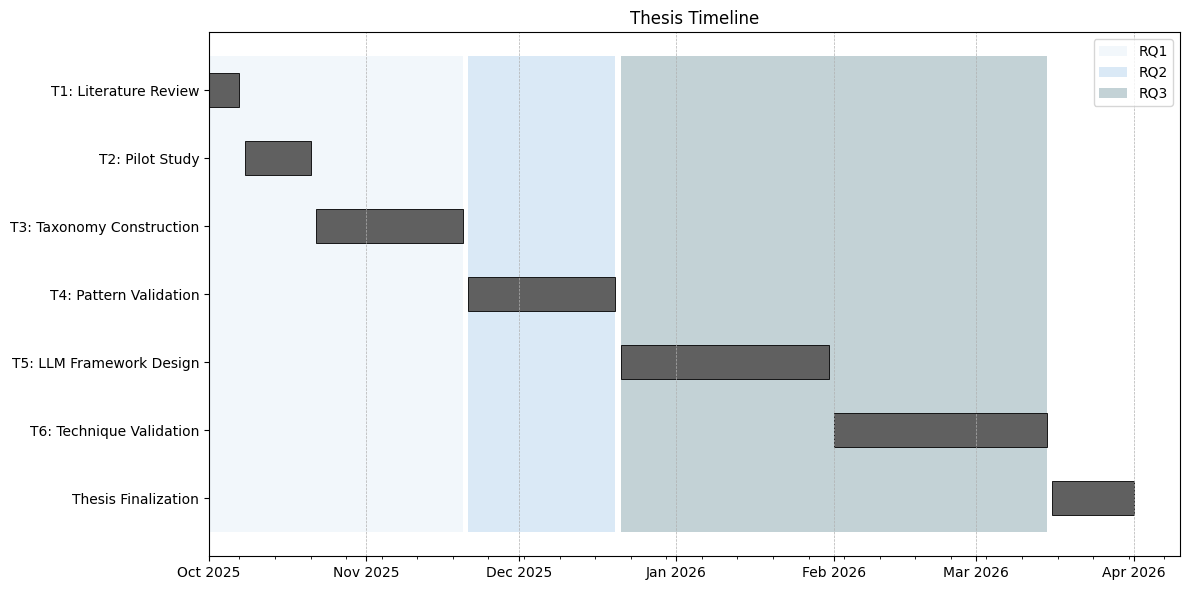

In [9]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.patches import Rectangle
from datetime import datetime

# --------- Data ---------
tasks = [
    ("T1: Literature Review", "2025-10-01", "2025-10-07"),
    ("T2: Pilot Study", "2025-10-08", "2025-10-21"),
    ("T3: Taxonomy Construction", "2025-10-22", "2025-11-20"),
    ("T4: Pattern Validation", "2025-11-21", "2025-12-20"),
    ("T5: LLM Framework Design", "2025-12-21", "2026-01-31"),
    ("T6: Technique Validation", "2026-02-01", "2026-03-15"),
    ("Thesis Finalization", "2026-03-16", "2026-04-01"),
]

# RQ spans (for context)
rq_spans = [
    ("RQ1", "2025-10-01", "2025-11-20"),
    ("RQ2", "2025-11-21", "2025-12-20"),
    ("RQ3", "2025-12-21", "2026-03-15"),
]

# Convert strings to datetime
def d(s): 
    return datetime.strptime(s, "%Y-%m-%d")

task_names = [t[0] for t in tasks]
starts = [d(t[1]) for t in tasks]
ends = [d(t[2]) for t in tasks]
durations = [(e - s).days for s, e in zip(starts, ends)]

# --------- Plot ---------
fig, ax = plt.subplots(figsize=(12, 6))

# Distinct shades of blue (light sky, medium royal, deep navy/teal)
colors = ["#cfe2f3", "#6fa8dc", "#134f5c"]
ymin, ymax = -0.5, len(tasks) - 0.5
for (rq, s, e), color in zip(rq_spans, colors):
    sdt, edt = d(s), d(e)
    ax.add_patch(Rectangle(
        (mdates.date2num(sdt), ymin),
        width=mdates.date2num(edt) - mdates.date2num(sdt),
        height=len(tasks),
        alpha=0.25,
        facecolor=color,
        edgecolor="none",
        label=rq
    ))

# Plot task bars in darker gray with a thin black edge
for i, (name, start, end) in enumerate(tasks):
    ax.barh(
        i, durations[i], left=starts[i], height=0.5, align="center",
        color="#606060", edgecolor="black", linewidth=0.6
    )

# Y-axis labels
ax.set_yticks(range(len(task_names)))
ax.set_yticklabels(task_names)
ax.invert_yaxis()

# X-axis formatting: months only
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
ax.xaxis.set_minor_locator(mdates.WeekdayLocator())

# Grid and labels
ax.grid(True, axis="x", which="major", linestyle="--", linewidth=0.5)
ax.set_title("Thesis Timeline")

# Legend for RQs
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:3], labels[:3], loc="upper right")

plt.tight_layout()
plt.savefig("thesis_gantt_timeline.png", dpi=300, bbox_inches="tight")  # High-res PNG
plt.savefig("thesis_gantt_timeline.pdf", bbox_inches="tight")          # PDF (for LaTeX)

plt.show()
